In [2]:
from PIL import Image
import numpy as np
from IPython import display

import pyaes
import pbkdf2
import binascii
import os
import secrets

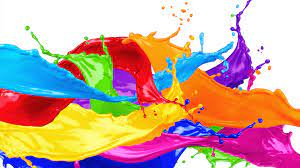

In [3]:
np_image=np.array(Image.open('image.jpg')) # PIXELS ARE STORED IN A NP-ARRAY
display.Image("image.jpg")

In [4]:
print(np_image)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 204]
  [240 250 225]
  [226 229 255]
  ...
  [215   7 143]
  [215   7 143]
  [215   7 143]]

 [[215 216 185]
  [254 255 218]
  [248 255 239]
  ...
  [217   9 145]
  [217   9 145]
  [217   9 145]]

 [[255 248 255]
  [240 244 211]
  [249 255 216]
  ...
  [218  10 146]
  [218  10 146]
  [218  10 146]]]


In [5]:
np_encrypted=np_image.astype(bytes) #NP-ARRAY TO STORE THE ENCRYPTED NUMBERS IN BYTE-ARRAY

In [6]:
password="aespython"
passwordSalt=os.urandom(16)
key=pbkdf2.PBKDF2(password, passwordSalt).read(32) #KEY - PRE-SHARED WITH THE RECEIVER
iv=secrets.randbits(256) #INITIALIZATION VECTOR - PRE-SHARED WITH THE RECEIVER

for i in range(0,len(np_image)): #ENCRYPTION
    for j in range(0,len(np_image[i])):
        for k in range(0,len(np_image[i][j])):
            aes=pyaes.AESModeOfOperationCTR(key,pyaes.Counter(iv))
            np_encrypted[i][j][k]=aes.encrypt(str(np_image[i][j][k]))

In [7]:
print(np_encrypted)

[[[b')\x08b' b')\x08b' b')\x08b']
  [b')\x08b' b')\x08b' b')\x08b']
  [b')\x08b' b')\x08b' b')\x08b']
  ...
  [b')\x08d' b')\x08d' b')\x08d']
  [b')\x08d' b')\x08d' b')\x08d']
  [b')\x08d' b')\x08d' b')\x08d']]

 [[b')\x08b' b')\x08b' b')\x08b']
  [b')\x08b' b')\x08b' b')\x08b']
  [b')\x08b' b')\x08b' b')\x08b']
  ...
  [b')\x08d' b')\x08d' b')\x08d']
  [b')\x08d' b')\x08d' b')\x08d']
  [b')\x08d' b')\x08d' b')\x08d']]

 [[b')\x08b' b')\x08b' b')\x08b']
  [b')\x08b' b')\x08b' b')\x08b']
  [b')\x08b' b')\x08b' b')\x08b']
  ...
  [b')\x08d' b')\x08d' b')\x08d']
  [b')\x08d' b')\x08d' b')\x08d']
  [b')\x08d' b')\x08d' b')\x08d']]

 ...

 [[b')\x08e' b')\x08d' b')\re']
  [b')\ta' b')\x08a' b')\x0fd']
  [b')\x0fg' b')\x0fh' b')\x08d']
  ...
  [b')\x0cd' b',' b'*\tb']
  [b')\x0cd' b',' b'*\tb']
  [b')\x0cd' b',' b'*\tb']]

 [[b')\x0cd' b')\x0cg' b'*\x05d']
  [b')\x08e' b')\x08d' b')\x0ci']
  [b')\ti' b')\x08d' b')\x0eh']
  ...
  [b')\x0cf' b'"' b'*\td']
  [b')\x0cf' b'"' b'*\td']
  [b')\x0cf

In [8]:
np_decrypted=np_image.astype(int) #NP-ARRAY TO STORE THE DECRYPTED NUMBERS 

In [9]:
for i in range(0,len(np_encrypted)): #DECRYPTION
    for j in range(0,len(np_encrypted[i])):
        for k in range(0,len(np_encrypted[i][j])):
            aes=pyaes.AESModeOfOperationCTR(key,pyaes.Counter(iv))
            np_decrypted[i][j][k]=int(aes.decrypt(np_encrypted[i][j][k]))

In [10]:
print(np_decrypted)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 204]
  [240 250 225]
  [226 229 255]
  ...
  [215   7 143]
  [215   7 143]
  [215   7 143]]

 [[215 216 185]
  [254 255 218]
  [248 255 239]
  ...
  [217   9 145]
  [217   9 145]
  [217   9 145]]

 [[255 248 255]
  [240 244 211]
  [249 255 216]
  ...
  [218  10 146]
  [218  10 146]
  [218  10 146]]]


In [ ]:
decrypted_img=Image.fromarray(np_decrypted)

decrypted_img.save('decrypted.jpg')